In [ ]:
import numpy as np
import pandas as pd
import os
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Covid'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Covid/covid/COVID-120.png
/content/drive/MyDrive/Covid/covid/COVID-123.png
/content/drive/MyDrive/Covid/covid/COVID-122.png
/content/drive/MyDrive/Covid/covid/COVID-12.png
/content/drive/MyDrive/Covid/covid/COVID-124.png
/content/drive/MyDrive/Covid/covid/COVID-121.png
/content/drive/MyDrive/Covid/covid/COVID-119.png
/content/drive/MyDrive/Covid/covid/COVID-118.png
/content/drive/MyDrive/Covid/covid/COVID-117.png
/content/drive/MyDrive/Covid/covid/COVID-116.png
/content/drive/MyDrive/Covid/covid/COVID-111.png
/content/drive/MyDrive/Covid/covid/COVID-113.png
/content/drive/MyDrive/Covid/covid/COVID-115.png
/content/drive/MyDrive/Covid/covid/COVID-112.png
/content/drive/MyDrive/Covid/covid/COVID-114.png
/content/drive/MyDrive/Covid/covid/COVID-110.png
/content/drive/MyDrive/Covid/covid/COVID-11.png
/content/drive/MyDrive/Covid/covid/COVID-109.png
/content/drive/MyDrive/Covid/covid/COVID-108.png
/content/drive/MyDrive/Covid/covid/COVID-107.png
/content/drive/MyDrive

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
dataset = "/content/drive/MyDrive/Covid"

In [ ]:
args={}
args["dataset"]=dataset

In [ ]:
import numpy as np
import cv2
iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
import os
Data_Dir = "/content/drive/MyDrive/Covid//"

In [ ]:
Cimages = os.listdir(Data_Dir +"covid")
Nimages = os.listdir(Data_Dir +"normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


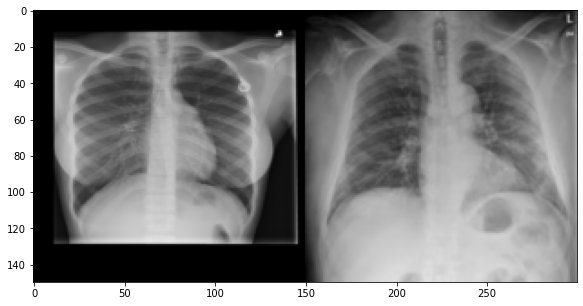

Normal Chest X-ray Vs Covid-19 Chest X-ray


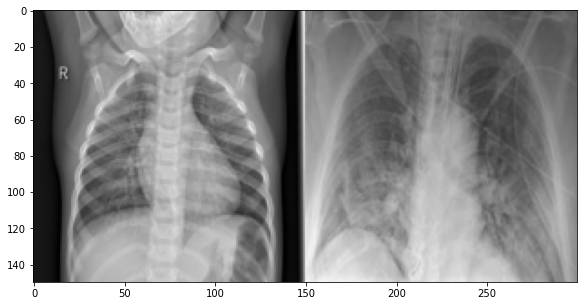

Normal Chest X-ray Vs Covid-19 Chest X-ray


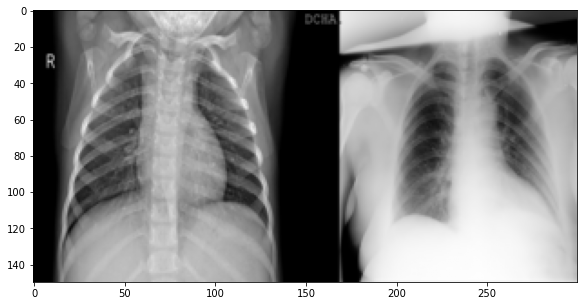

Normal Chest X-ray Vs Covid-19 Chest X-ray


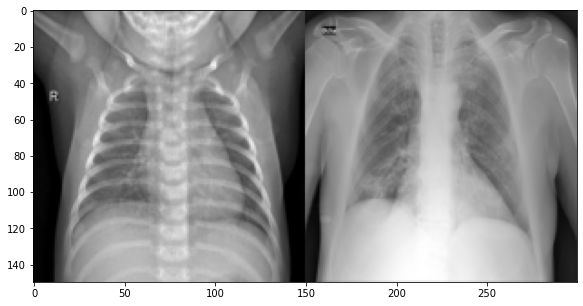

Normal Chest X-ray Vs Covid-19 Chest X-ray


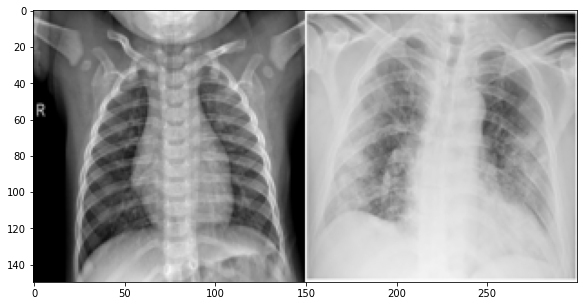

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Data_Dir+"normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [ ]:
labels

array(['covid', 'covid', 'covid', ..., 'normal', 'normal', 'normal'],
      dtype='<U6')

In [ ]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels); 
print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=12)
trainAug = ImageDataGenerator(rotation_range=15,fill_mode="nearest")

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


**VGG16**

In [ ]:
model = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
Model = model.output #head_Model
Model = AveragePooling2D(pool_size=(4, 4))(Model)
Model = Flatten(name="flatten")(Model)
Model = Dense(64, activation="relu")(Model)
Model = Dropout(0.5)(Model)
Model = Dense(2, activation="softmax")(Model)
model = keras.Model(inputs=model.input, outputs=Model)
for layer in model.layers:
    layer.trainable = False

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600, 2), (400, 2))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


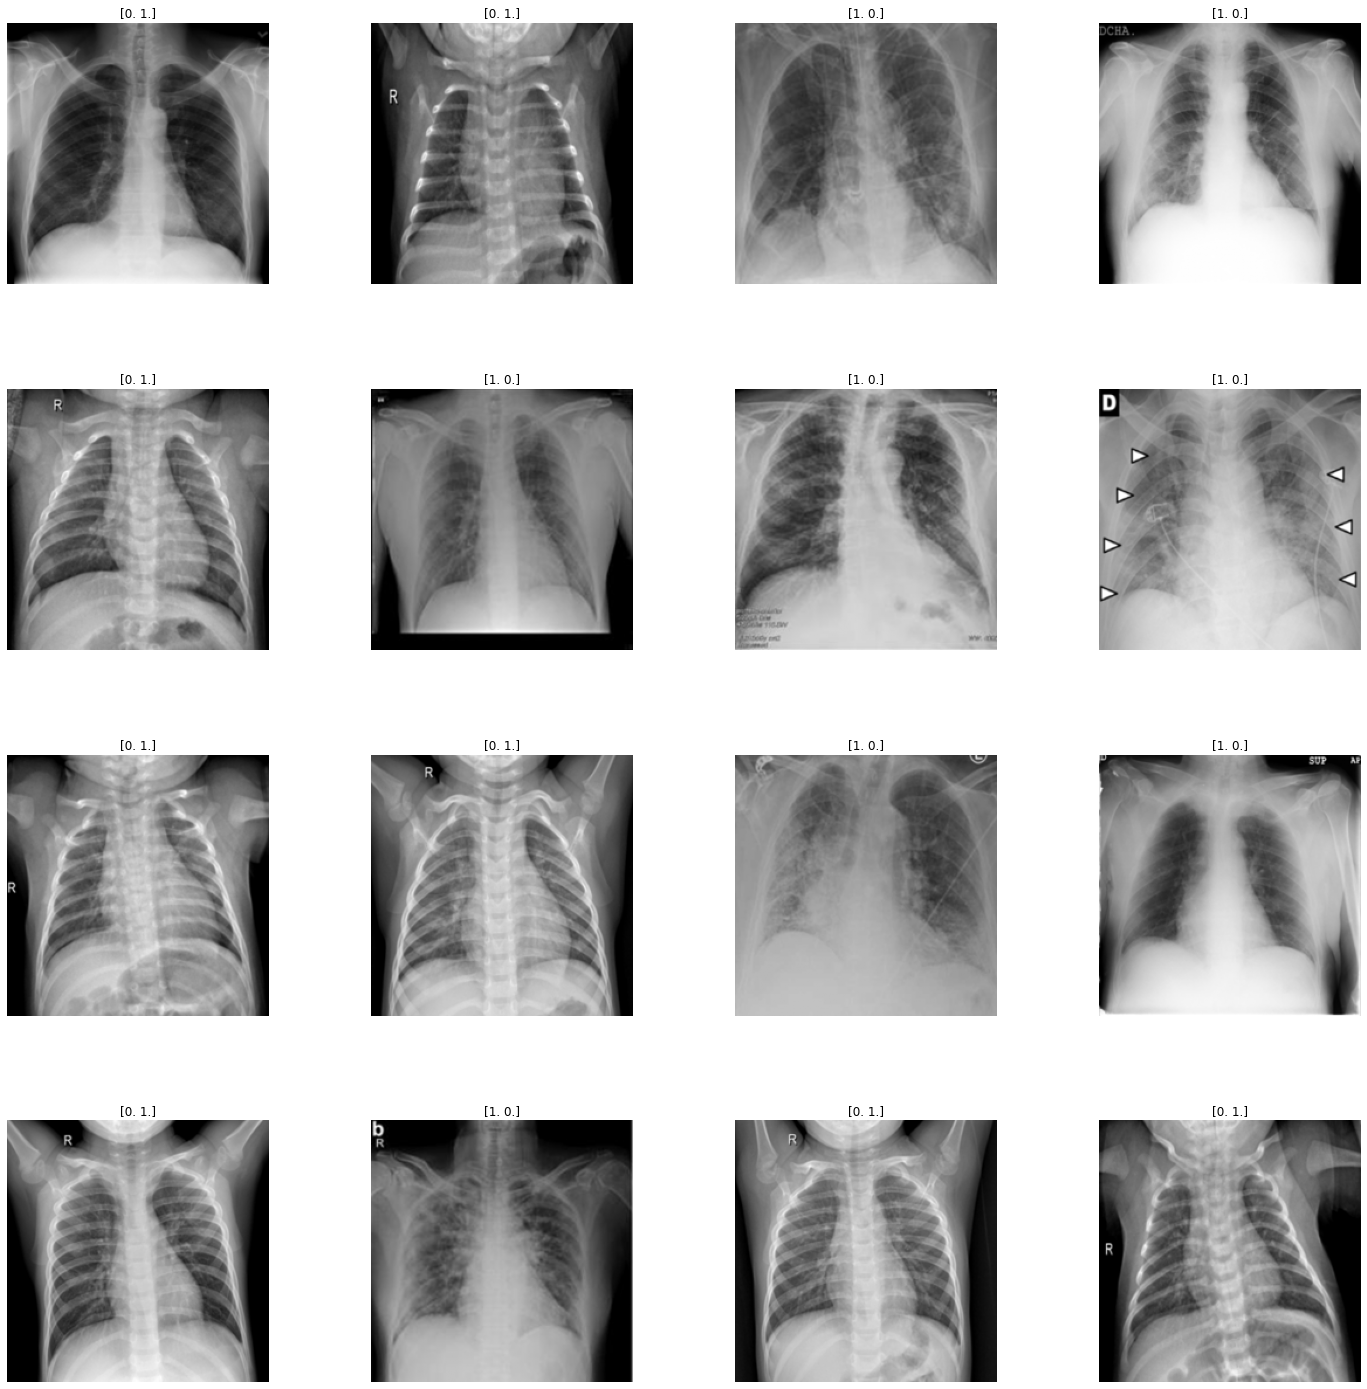

In [ ]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 32

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Compiling Starts


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
50/50 [==============================] - 1044s 21s/step - loss: 0.7786 - accuracy: 0.4981 - val_loss: 0.7627 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 1025s 21s/step - loss: 0.7934 - accuracy: 0.4831 - val_loss: 0.7627 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 1025s 21s/step - loss: 0.7899 - accuracy: 0.4781 - val_loss: 0.7627 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 1025s 21s/step - loss: 0.7932 - accuracy: 0.4881 - val_loss: 0.7627 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 1022s 21s/step - loss: 0.7883 - accuracy: 0.4806 - val_loss: 0.7627 - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 1024s 21s/step - loss: 0.7937 - accuracy: 0.4856 - val_loss: 0.7627 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 1021s 21s/step - loss: 0.7856 - accuracy: 0.5094 - val_loss: 0.7627 - val_accuracy: 0.5000

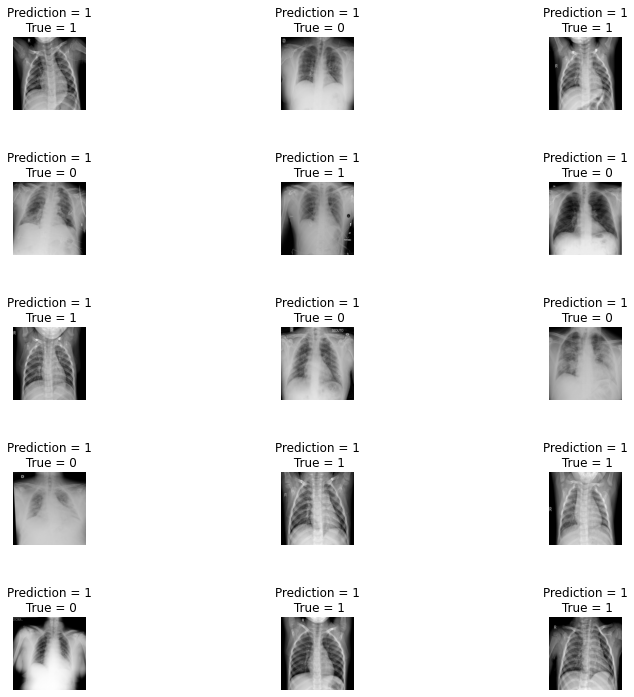

In [ ]:
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i],
                                                           Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       covid       0.00      0.00      0.00       200
      normal       0.50      1.00      0.67       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.5

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[  0 200]
 [  0 200]]
acc: 0.5000
sensitivity: 0.0000
specificity: 1.0000


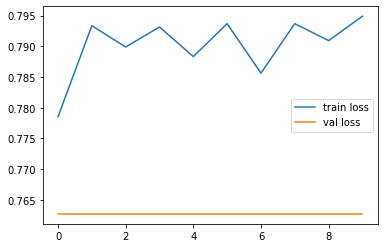

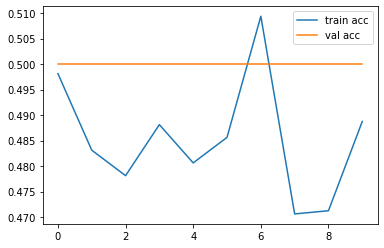

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('Covid_model.h5')

Prediction: Normal


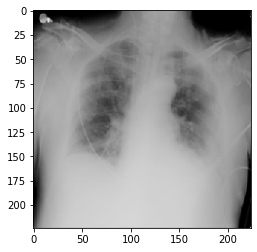

In [ ]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('/content/drive/MyDrive/Covid/covid/COVID-1.png', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

Prediction: Normal


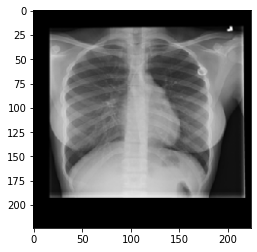

In [ ]:
img = image.load_img('/content/drive/MyDrive/Covid/normal/Normal-1.png', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')